In [137]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from setup import *
from dataloader import load_demo, load_aggregate_travel_behavior
import util_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
od_mode = pd.read_csv(data_dir+"od_mode.csv")

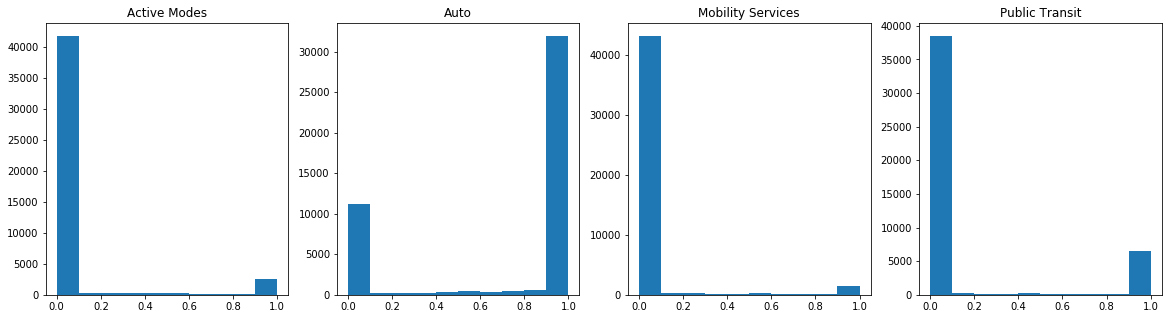

In [8]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].hist(od_mode[od_mode['mode']==1]['mode_share'], bins = np.linspace(0,1,11))
ax[1].hist(od_mode[od_mode['mode']==2]['mode_share'], bins = np.linspace(0,1,11))
ax[2].hist(od_mode[od_mode['mode']==3]['mode_share'], bins = np.linspace(0,1,11))
ax[3].hist(od_mode[od_mode['mode']==4]['mode_share'], bins = np.linspace(0,1,11))
ax[0].set_title("Active Modes")
ax[1].set_title("Auto")
ax[2].set_title("Mobility Services")
ax[3].set_title("Public Transit");

In [9]:
od_mode = pd.read_csv(data_dir+"od_mode_filtered.csv")

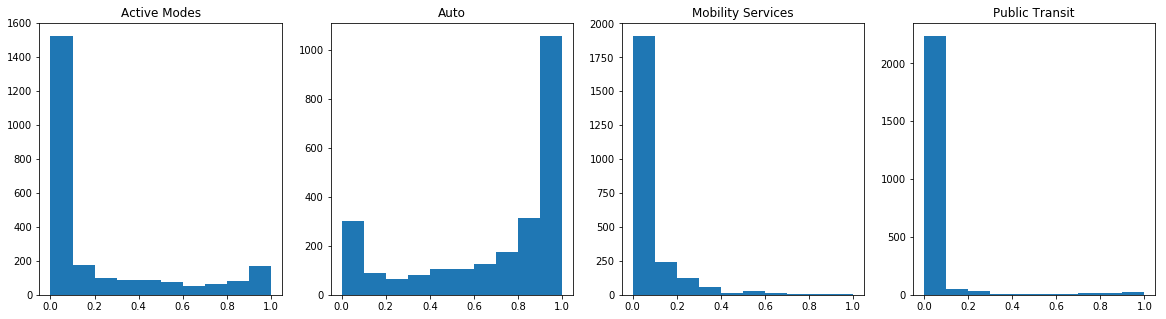

In [10]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].hist(od_mode[od_mode['mode']==1]['mode_share'], bins = np.linspace(0,1,11))
ax[1].hist(od_mode[od_mode['mode']==2]['mode_share'], bins = np.linspace(0,1,11))
ax[2].hist(od_mode[od_mode['mode']==3]['mode_share'], bins = np.linspace(0,1,11))
ax[3].hist(od_mode[od_mode['mode']==4]['mode_share'], bins = np.linspace(0,1,11))
ax[0].set_title("Active Modes")
ax[1].set_title("Auto")
ax[2].set_title("Mobility Services")
ax[3].set_title("Public Transit");

In [2]:
demo_cs, demo_np = load_demo(data_dir, norm=None)

In [208]:
dt = "17_31_839100"
# north = "17_31_221600"
north = "17_31_802300"
south = "17_31_842100"
# south = "17_31_230600"

demo = pd.DataFrame(demo_np[np.array([demo_cs.index(dt),demo_cs.index(north),demo_cs.index(south)]), :], 
             columns=['tot_population','pct25_34yrs','pct35_50yrs','pctover65yrs',
         'pctwhite_alone','pct_nonwhite','pctblack_alone',
         'pct_col_grad','avg_tt_to_work','inc_per_capita'], index=[dt, north, south])

file = "origin_trip_behavior.csv"
trip = load_aggregate_travel_behavior(file)
trip = trip[trip['geoid'].isin([dt,north,south])][['geoid','active','auto','mas','pt','trpgen','area']].set_index('geoid')

df = pd.merge(demo, trip, left_index=True, right_index=True)
df['trip_rate'] = df['trpgen']/df['area']
df['pop_density'] = df['tot_population']/df['area']

print(df)

              tot_population  pct25_34yrs  pct35_50yrs  pctover65yrs  \
17_31_839100          7352.0     0.400979     0.204706      0.029788   
17_31_802300          5386.0     0.083921     0.212774      0.206461   
17_31_842100          7489.0     0.126586     0.163039      0.086126   

              pctwhite_alone  pct_nonwhite  pctblack_alone  pct_col_grad  \
17_31_839100        0.600653      0.399347        0.105141      0.759198   
17_31_802300        0.801522      0.198478        0.010769      0.781677   
17_31_842100        0.188410      0.811590        0.448391      0.154680   

              avg_tt_to_work  inc_per_capita    active      auto       mas  \
17_31_839100       28.008480    70845.589635  0.383956  0.120298  0.028357   
17_31_802300       37.056962    90800.000000  0.065440  0.865989  0.017926   
17_31_842100       41.446287    12235.396715  0.707839  0.028157  0.000000   

                    pt      trpgen      area   trip_rate  pop_density  
17_31_839100  0.46738

In [206]:
df.to_csv(out_dir+"representative_tracts.csv")

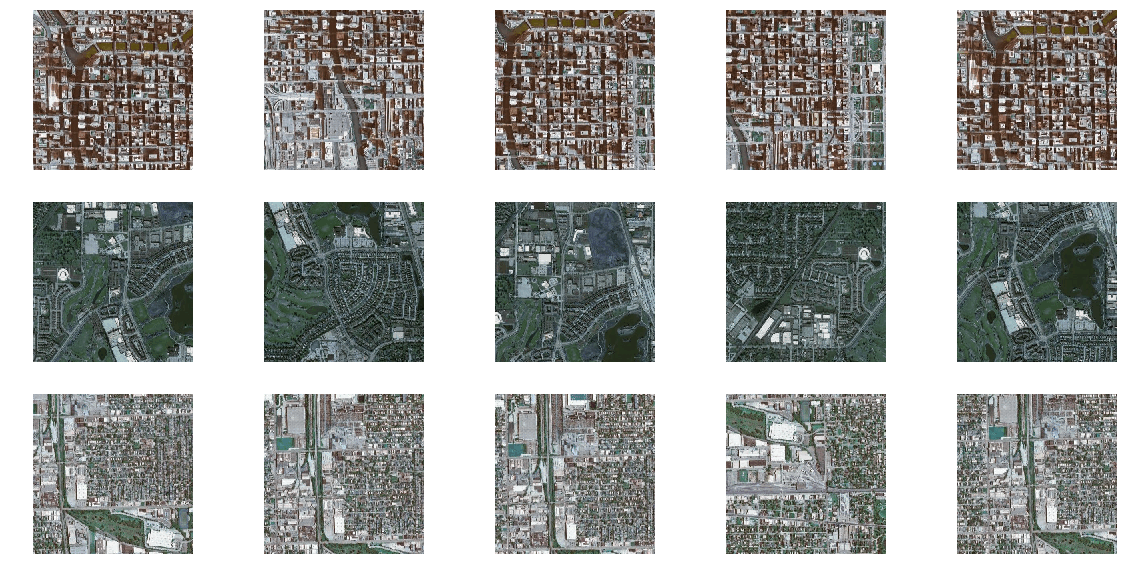

In [195]:
images1 = glob.glob(image_dir+"zoom15/"+dt+"_*.png")
images2 = glob.glob(image_dir+"zoom15/"+north+"_*.png")
images3 = glob.glob(image_dir+"zoom15/"+south+"_*.png")

num_per_row = 5
fig, ax = plt.subplots(3,num_per_row,figsize=(num_per_row*4, num_per_row*2))
for i1, i2, i3, i in zip(images1, images2, images3, np.arange(num_per_row)):
    im = cv2.imread(i1)
    ax[0,i].imshow(util_image.center_crop(im, (400,400)))
    im = cv2.imread(i2)
    ax[1,i].imshow(util_image.center_crop(im, (400,400)))
    im = cv2.imread(i3)
    ax[2,i].imshow(util_image.center_crop(im, (400,400)))
    
    ax[0,i].axis('off')
    ax[1,i].axis('off')
    ax[2,i].axis('off')

plt.show()